In [21]:
# Filter the DataFrame for years between 2001 and 2022 (inclusive) using 'YEAR4'
df_filtered_years = df[(df['YEAR4'] >= 2001) & (df['YEAR4'] <= 2022)]

# Calculate the mean of 'ACCDMG' for the filtered data and round to two decimal places
mean_accdmg = round(df_filtered_years['ACCDMG'].mean(), 2)

print(f"Mean ACCDMG from 2001 to 2022: {mean_accdmg}")

Mean ACCDMG from 2001 to 2022: 715518.87


In [22]:
mean_accdmg_full_dataset = round(df['ACCDMG'].mean(), 2)
print(f"Mean ACCDMG for the entire dataset: {mean_accdmg_full_dataset}")

Mean ACCDMG for the entire dataset: 715518.87


In [23]:
# Calculate the frequency of each accident month (IMO)
month_counts = df['IMO'].value_counts()

# Get the most common month
most_common_month = month_counts.idxmax()
count_of_most_common_month = month_counts.max()

print(f"The most common accident month (IMO) is: {most_common_month}")
print(f"It occurred {count_of_most_common_month} times.")

The most common accident month (IMO) is: 7
It occurred 746 times.


In [24]:
# Filter for accidents involving at least one car carrying hazardous materials (CARSHZD > 0)
hazmat_accidents = df[df['CARSHZD'] > 0]

# Count the number of such accidents
hazmat_accidents_count = len(hazmat_accidents)

print(f"Number of accidents involving at least one car carrying hazardous materials: {hazmat_accidents_count}")

Number of accidents involving at least one car carrying hazardous materials: 305


In [25]:
# Group by YEAR4 and IMO, then sum ACCDMG for each group
year_month_accdmg = df.groupby(['YEAR4', 'IMO'])['ACCDMG'].sum()

# Find the year-month combination with the highest total ACCDMG
highest_accdmg_combination = year_month_accdmg.idxmax()
highest_accdmg_value = year_month_accdmg.max()

print(f"The year-month combination with the highest total ACCDMG is {highest_accdmg_combination} with a total of {highest_accdmg_value:.2f}")

The year-month combination with the highest total ACCDMG is (np.int64(2015), np.int64(5)) with a total of 102278393.00


In [26]:
# Filter the DataFrame for accidents of TYPE 1
df_type1_accidents = df[df['TYPE'] == 1]

# Calculate the mean TRNSPD for TYPE 1 accidents
mean_trnspd_type1 = df_type1_accidents['TRNSPD'].mean()

print(f"The mean TRNSPD for accidents of TYPE 1 is: {mean_trnspd_type1:.2f}")

The mean TRNSPD for accidents of TYPE 1 is: 19.90


In [27]:
# Calculate the overall mean of TRNSPD for the entire dataset
overall_mean_trnspd = round(df['TRNSPD'].mean(), 2)

print(f"The overall mean TRNSPD for the entire dataset is: {overall_mean_trnspd:.2f}")

The overall mean TRNSPD for the entire dataset is: 20.13


In [28]:
# Group by IMO and sum TOTINJ for each month
month_total_totinj = df.groupby('IMO')['TOTINJ'].sum()

# Find the IMO with the highest total TOTINJ
highest_totinj_month = month_total_totinj.idxmax()
highest_totinj_value = month_total_totinj.max()

print(f"The IMO with the highest total TOTINJ is {highest_totinj_month} with a total of {highest_totinj_value} injuries.")

The IMO with the highest total TOTINJ is 1 with a total of 1657 injuries.


In [29]:
# Find the maximum TOTINJ value in the DataFrame
max_totinj_value = df['TOTINJ'].max()

# Filter the DataFrame to get all accidents with this maximum TOTINJ value
accidents_with_highest_totinj = df[df['TOTINJ'] == max_totinj_value]

print(f"Accident(s) with the highest total injuries (TOTINJ = {max_totinj_value}):")
display(accidents_with_highest_totinj)

Accident(s) with the highest total injuries (TOTINJ = 1000):


,Unnamed: 0,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,...,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV,Type,Typeq,Cause
384,385,2,1,SOO,170488,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Derailment,Freight,T


In [30]:

# Check if the accident with the highest TOTINJ matches the given criteria
# Ensure the columns exist before accessing them

weather_condition = accidents_with_highest_totinj['WEATHER'].iloc[0] == 4 if 'WEATHER' in accidents_with_highest_totinj.columns else False
cause_condition = accidents_with_highest_totinj['CAUSE'].iloc[0] == 'H' if 'CAUSE' in accidents_with_highest_totinj.columns else False
type_condition = accidents_with_highest_totinj['TYPE'].iloc[0] == 1 if 'TYPE' in accidents_with_highest_totinj.columns else False
accdmg_condition = accidents_with_highest_totinj['ACCDMG'].iloc[0] < 2000000 if 'ACCDMG' in accidents_with_highest_totinj.columns else False


print(f"Does the accident have WEATHER = 4? {weather_condition}")
print(f"Does the accident have CAUSE = H? {cause_condition}")
print(f"Does the accident have TYPE = 1? {type_condition}")
print(f"Does the accident have ACCDMG less than 2 million? {accdmg_condition}")

if weather_condition and cause_condition and type_condition and accdmg_condition:
    print("Yes, the accident with the highest TOTINJ meets all the specified conditions.")
else:
    print("No, the accident with the highest TOTINJ does not meet all the specified conditions.")

Does the accident have WEATHER = 4? False
Does the accident have CAUSE = H? False
Does the accident have TYPE = 1? True
Does the accident have ACCDMG less than 2 million? True
No, the accident with the highest TOTINJ does not meet all the specified conditions.


In [31]:
missing_values_trkdnsty = df['TRKDNSTY'].isnull().sum()
print(f"Number of missing values in 'TRKDNSTY': {missing_values_trkdnsty}")

Number of missing values in 'TRKDNSTY': 2311


In [32]:
# Calculate the total number of words in NARR1
# Fill NaN values with an empty string to avoid errors during string operations
total_words_narr1 = df['NARR1'].fillna('').apply(lambda x: len(str(x).split())).sum()

print(f"The total number of words in NARR1 in the full dataset is: {total_words_narr1}")

The total number of words in NARR1 in the full dataset is: 126450


In [33]:
# Calculate the number of words for each NARR1 entry, handling NaN values
word_counts_narr1 = df['NARR1'].fillna('').apply(lambda x: len(str(x).split()))

# Calculate the average number of words and round to a whole number
average_words_narr1 = round(word_counts_narr1.mean())

print(f"The average number of words in NARR1 is: {average_words_narr1}")

The average number of words in NARR1 is: 17


In [34]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# Get English stop words
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers, keep only letters and spaces
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return tokens

# Apply preprocessing to NARR1 column
# Fill NaN values with an empty string before processing
all_tokens = []
for narrative in df['NARR1'].fillna(''):
    all_tokens.extend(preprocess_text(narrative))

# Calculate word frequencies
word_counts = Counter(all_tokens)

# Get the 20 most common words
top_20_words = word_counts.most_common(20)

print("20 most frequent words in NARR1 after preprocessing:")
for word, count in top_20_words:
    print(f"{word}: {count}")

20 most frequent words in NARR1 after preprocessing:
train: 3279
derailed: 3237
cars: 3048
track: 2567
main: 1363
due: 1291
traveling: 1189
car: 978
crew: 894
pulling: 809
yard: 760
rail: 726
mp: 693
broken: 647
east: 640
emergency: 589
went: 572
lead: 546
west: 531
railcars: 530


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
# Filter the DataFrame for accidents of TYPE 1
accidents_type1 = df[df['TYPE'] == 1]

# Count the number of such accidents
count_type1_accidents = len(accidents_type1)

print(f"Number of accidents with TYPE = 1: {count_type1_accidents}")

Number of accidents with TYPE = 1: 6117


In [36]:
columns_to_check = ['ACCDMG', 'TRNSPD', 'TONS', 'TEMP', 'TYPE', 'CAUSE']

# Calculate the number of nulls in these specific columns BEFORE dropping
total_nulls_before_drop = df[columns_to_check].isnull().sum().sum()

# Create a new DataFrame with only the specified columns and drop nulls from them
df_filtered_cols = df[columns_to_check].dropna()

# Note: The number of rows dropped from these specific columns
# is equivalent to the total_nulls_before_drop IF each row had at most one null in these columns.
# However, if a row had multiple nulls across these columns, dropping it removes all of them.
# The request is for 'total null values dropped', implying the sum of nulls across these columns.

print(f"Total null values in the specified columns before dropping: {total_nulls_before_drop}")
print(f"Number of rows remaining after dropping nulls in these columns: {len(df_filtered_cols)}")
print(f"Number of rows with at least one null value in these columns that were dropped: {len(df) - len(df_filtered_cols)}")


Total null values in the specified columns before dropping: 0
Number of rows remaining after dropping nulls in these columns: 7602
Number of rows with at least one null value in these columns that were dropped: 0


In [37]:
# Create the FATALITY column
df['FATALITY'] = ((df['TOTINJ'] + df['TOTKLD']) > 0).astype(int)

# Count the number of accidents where FATALITY = 1
fatality_count = df['FATALITY'].sum()

print(f"Number of accidents with FATALITY = 1: {fatality_count}")

Number of accidents with FATALITY = 1: 694


In [9]:
# Filter correlations with TEMP that are greater than 0.5 (excluding TEMP itself)
high_temp_correlations_count = temp_correlations[abs(temp_correlations) > 0.5].drop('TEMP', errors='ignore').count()

print(f"Number of correlations with TEMP that are greater than 0.5 (absolute value): {high_temp_correlations_count}")

Number of correlations with TEMP that are greater than 0.5 (absolute value): 0


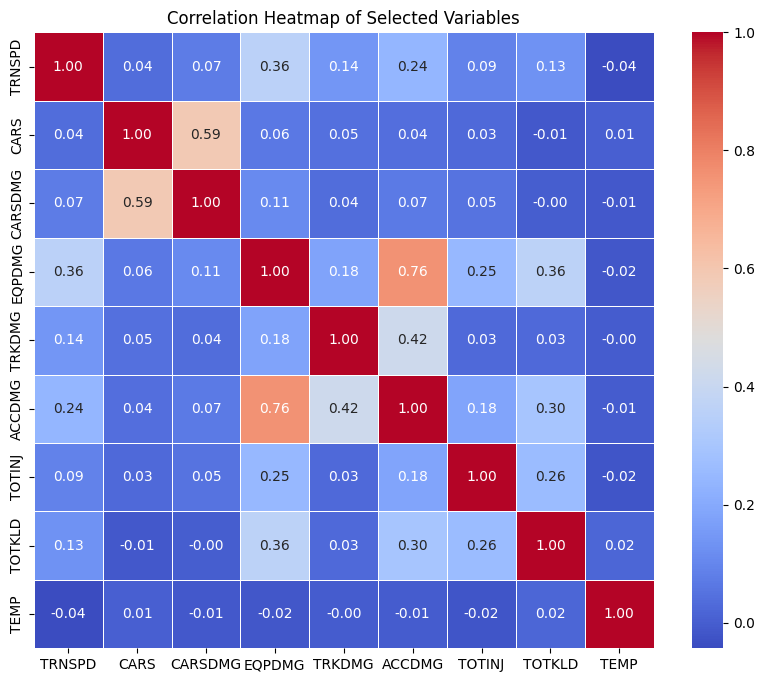

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols_heatmap = ['TRNSPD','CARS','CARSDMG','EQPDMG','TRKDMG','ACCDMG','TOTINJ','TOTKLD','TEMP']
correlation_matrix_selected = df[selected_cols_heatmap].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

<Figure size 1200x1000 with 0 Axes>

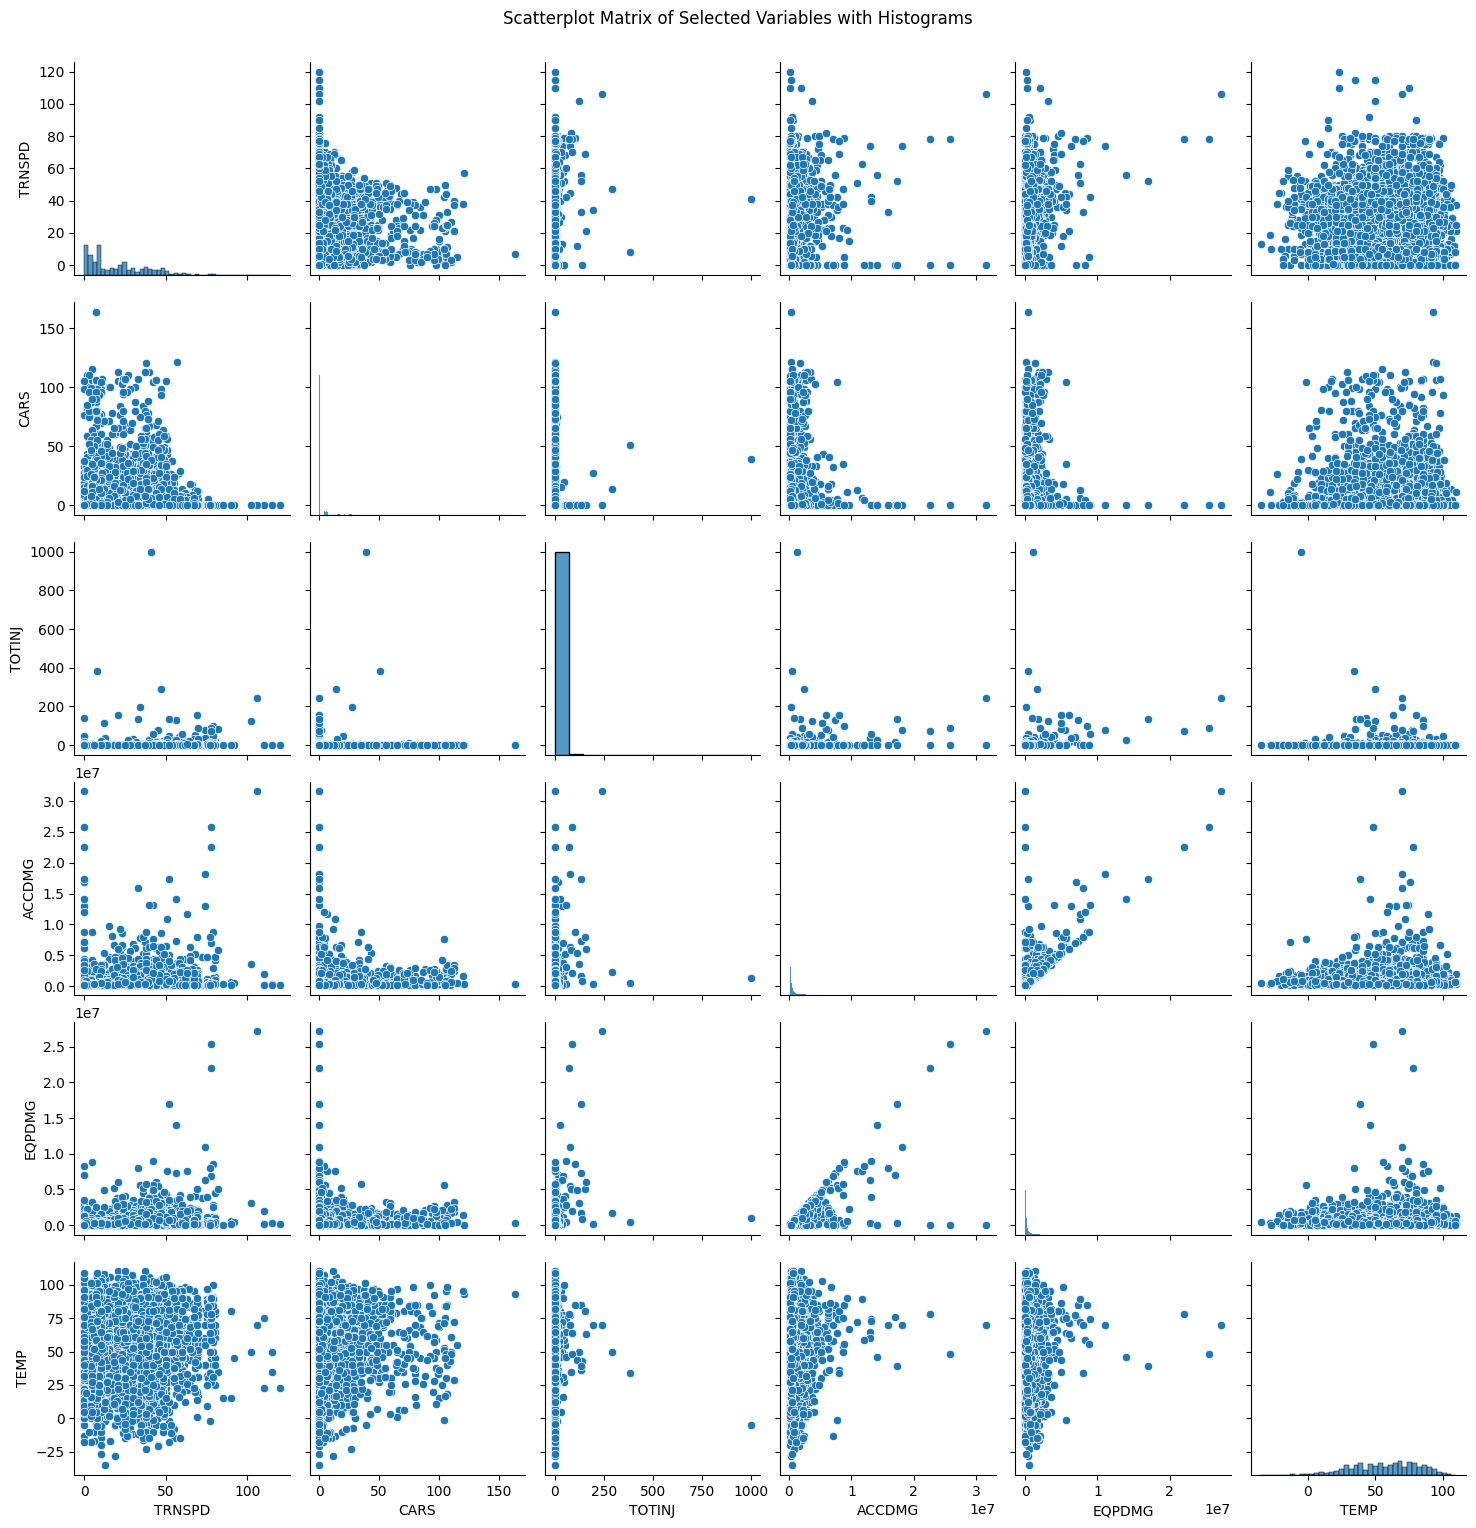

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols_pairplot = ['TRNSPD','CARS','TOTINJ','ACCDMG','EQPDMG', 'TEMP']

# Create a subset DataFrame for these variables
df_pairplot = df[selected_cols_pairplot]

# Generate a scatterplot matrix with histograms on the diagonal
plt.figure(figsize=(12, 10))
sns.pairplot(df_pairplot, diag_kind='hist')
plt.suptitle('Scatterplot Matrix of Selected Variables with Histograms', y=1.02)
plt.show()

/tmp/ipython-input-222606046.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='REGION', y='ACCDMG', data=df, errorbar=None, palette='viridis')


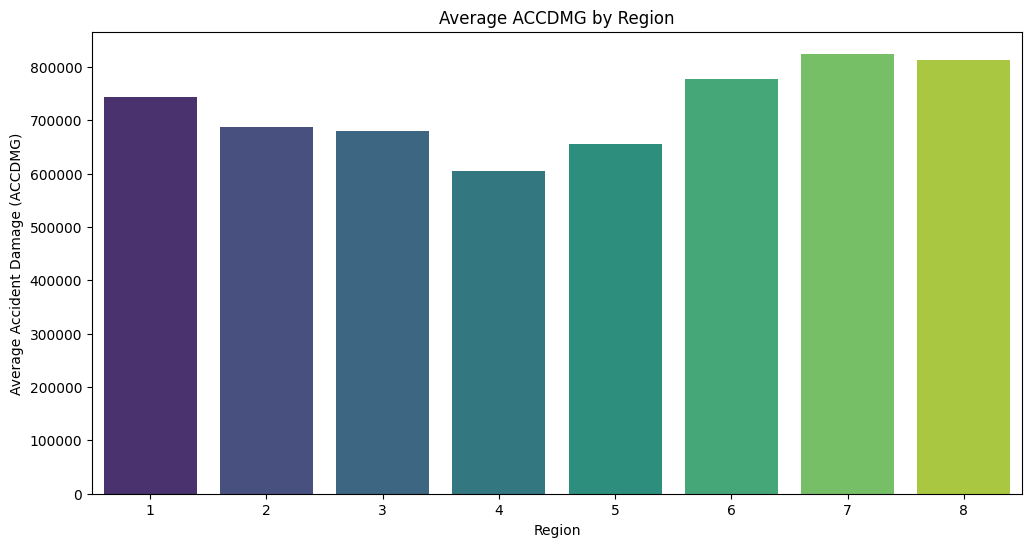

/tmp/ipython-input-222606046.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='REGION', y='ACCDMG', data=df, palette='viridis')


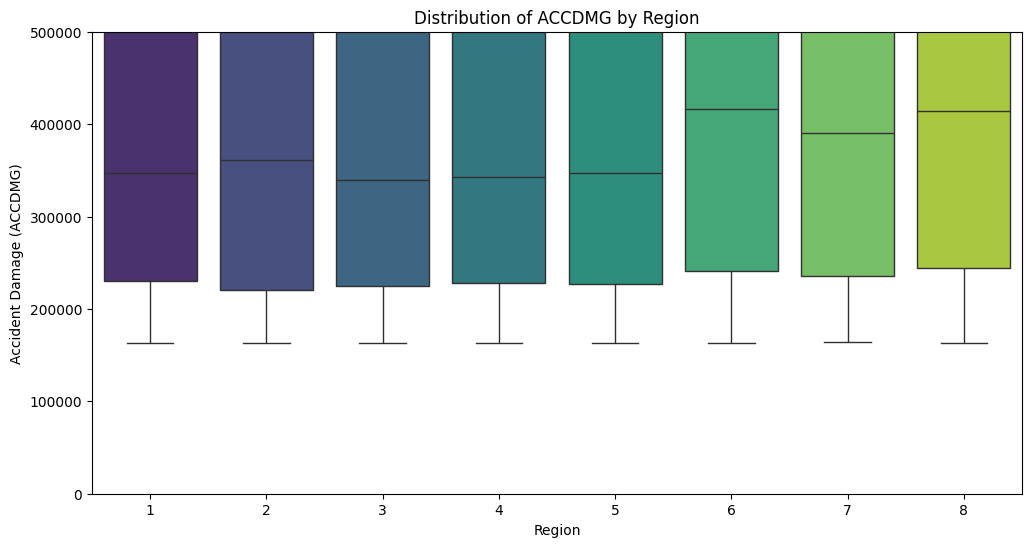

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for average ACCDMG by REGION
plt.figure(figsize=(12, 6))
sns.barplot(x='REGION', y='ACCDMG', data=df, errorbar=None, palette='viridis')
plt.title('Average ACCDMG by Region')
plt.xlabel('Region')
plt.ylabel('Average Accident Damage (ACCDMG)')
plt.show()

# Box plot for distribution of ACCDMG by REGION
plt.figure(figsize=(12, 6))
sns.boxplot(x='REGION', y='ACCDMG', data=df, palette='viridis')
plt.title('Distribution of ACCDMG by Region')
plt.xlabel('Region')
plt.ylabel('Accident Damage (ACCDMG)')
plt.ylim(0, 500000) # Limiting y-axis to better visualize the main distribution
plt.show()

/tmp/ipython-input-3639791029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='REGION', y='TOTINJ', data=df, errorbar=None, palette='magma')


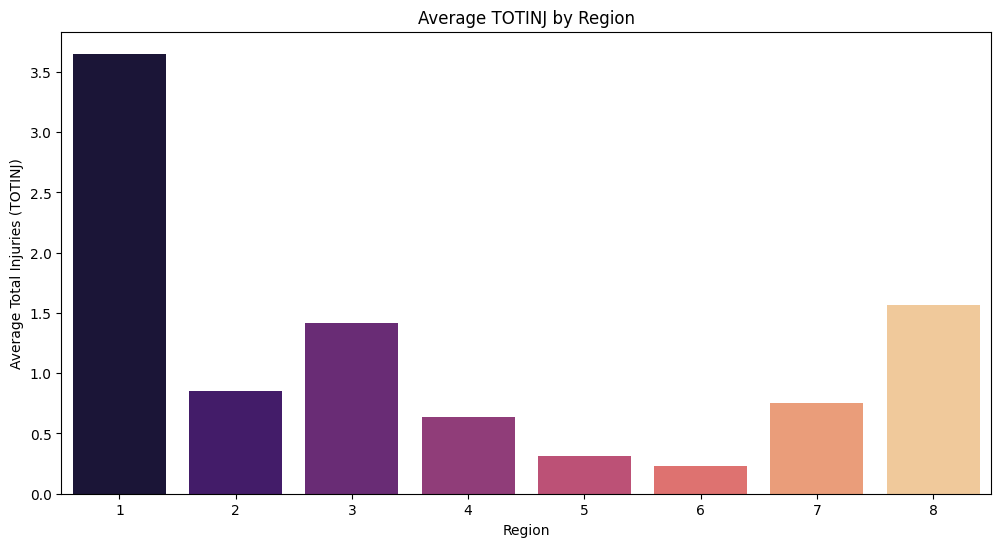

/tmp/ipython-input-3639791029.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='REGION', y='TOTINJ', data=df, palette='magma')


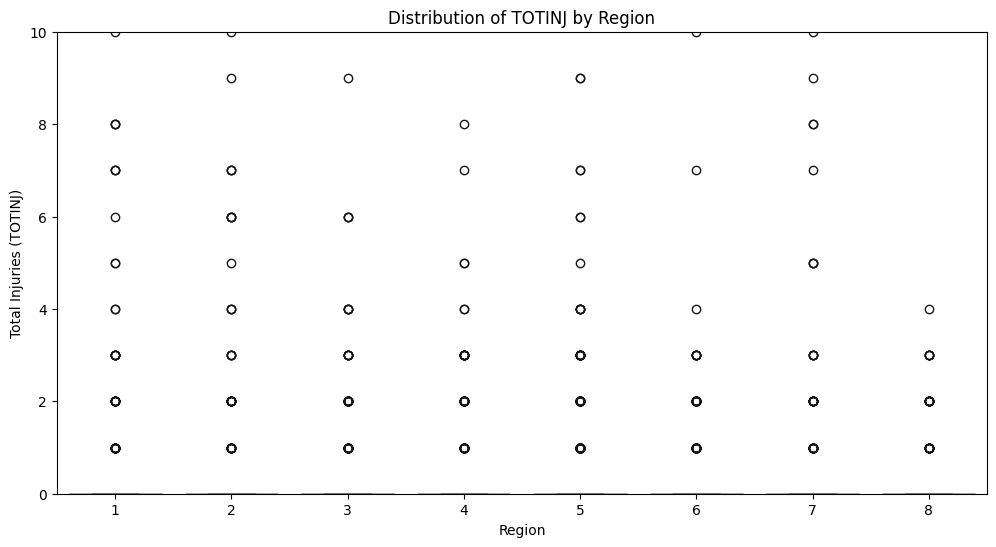

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for average TOTINJ by REGION
plt.figure(figsize=(12, 6))
sns.barplot(x='REGION', y='TOTINJ', data=df, errorbar=None, palette='magma')
plt.title('Average TOTINJ by Region')
plt.xlabel('Region')
plt.ylabel('Average Total Injuries (TOTINJ)')
plt.show()

# Box plot for distribution of TOTINJ by REGION
plt.figure(figsize=(12, 6))
sns.boxplot(x='REGION', y='TOTINJ', data=df, palette='magma')
plt.title('Distribution of TOTINJ by Region')
plt.xlabel('Region')
plt.ylabel('Total Injuries (TOTINJ)')
plt.ylim(0, 10) # Limiting y-axis to better visualize the main distribution
plt.show()

/tmp/ipython-input-2958428755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TYPE', y='TRNSPD', data=df, palette='cividis')


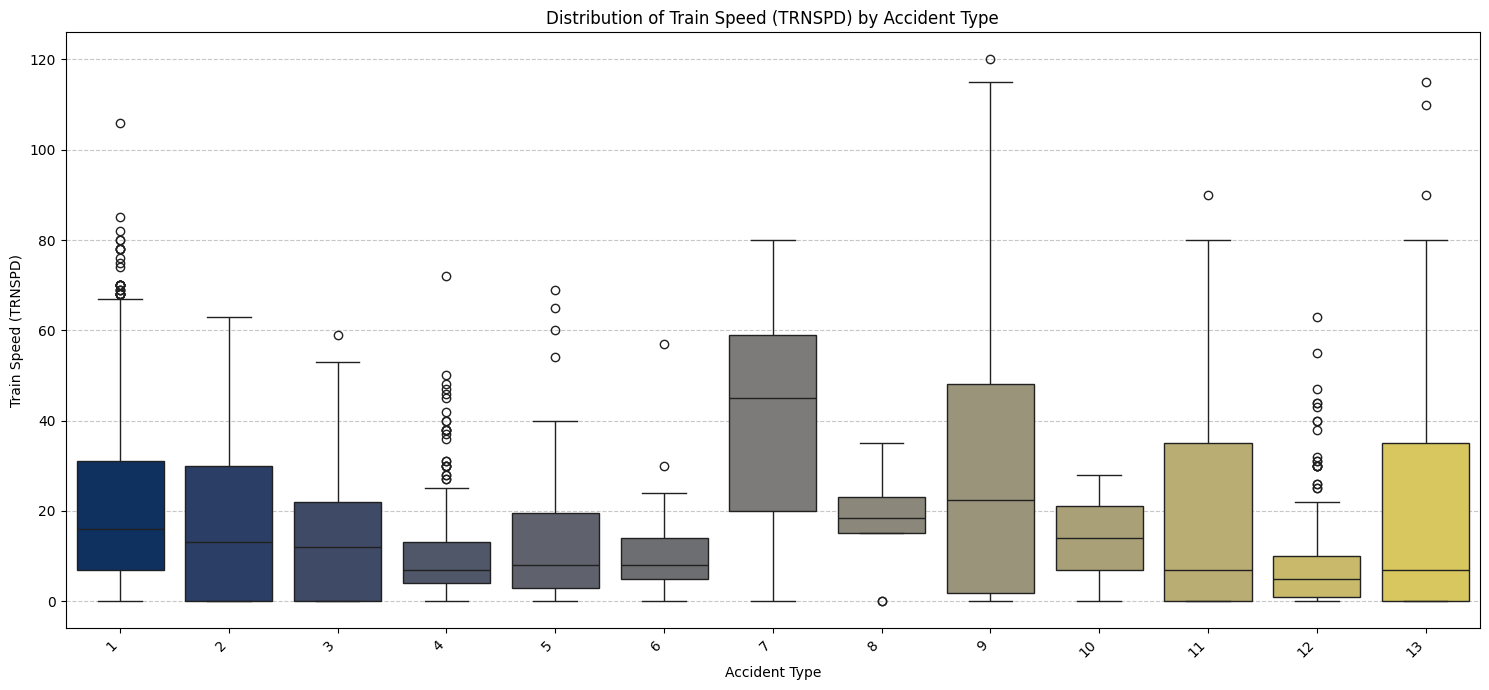

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for distribution of TRNSPD by TYPE
plt.figure(figsize=(15, 7))
sns.boxplot(x='TYPE', y='TRNSPD', data=df, palette='cividis')
plt.title('Distribution of Train Speed (TRNSPD) by Accident Type')
plt.xlabel('Accident Type')
plt.ylabel('Train Speed (TRNSPD)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if many types
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()